In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [11]:
#1. Load the csv file and show top 5 records from it.
#The .csv file is stored in the same folder, thus this code extracts it to a dataframe 
csv_file = os.path.join("./","players_20.csv")
players_df = pd.read_csv(csv_file)
players_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [12]:
#2. How would you see each column's name?
print(players_df.columns)
#This code will print every individual column title (not in a list):
#for title in players_df.columns:
#    print(title)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)


In [16]:
#3. Need to show number of rows and columns of this dataset.
#df.shape gives a touple of (rows, columns)
dimensions = players_df.shape
print(f"The data has {dimensions[0]} rows and {dimensions[1]} columns.")

The data has 18278 rows and 104 columns.


In [28]:
#4 Show number of players and their countries.
nations_df = players_df[['long_name','nationality']]
nations_df = nations_df.groupby(by='nationality').count().rename(columns={'long_name':'count'})
nations_df

,count
nationality,
Afghanistan,2
Albania,43
Algeria,50
Angola,16
Antigua & Barbuda,7
...,...
Venezuela,66
Vietnam,1
Wales,117


In [27]:
#5. If you find many records in point 4 then show only top 10 countries and their number of players.
nations_df.head(10)

,count
nationality,
Afghanistan,2
Albania,43
Algeria,50
Angola,16
Antigua & Barbuda,7
Argentina,886
Armenia,8
Australia,196
Austria,319


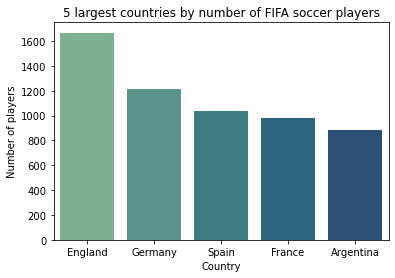

In [69]:
#6.Now you have to create a bar plot of top 5 countries and their number of players, try to fill green color in bars.
#Extract the top 5 nations from the data and create lists with both the nation's name and the player count, separately.
top_five_nations = nations_df.sort_values(by='count', ascending = False).head(5)
countries = top_five_nations.index
player_count = top_five_nations['count']

#Construct the bar chart using pyplot
sns.barplot(x=countries, y=player_count, palette='crest')
plt.title('5 largest countries by number of FIFA soccer players')
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.show()

#I used the crest color palette because I thought it looked better than pure green (this my specific color palettes),
#     but "Greens_d" or "Greens_r" would have given a purely green bar chart

In [84]:
#7.Show top 5 players short name and wages.
#Unclear on what qualifies a player as "top 5". Will use the "overall" column.

#Players_df appears to be sorted by overall, but may as well be certain
overall_sorted_df = players_df.sort_values(by=['overall'], ascending=False) 

#Because the "overall" column is discrete, there is a likelihood that there will be a tie for 5th place. These two lines will
#    ensure that anyone tied for 5th is displayed. .head() can be used to display only 5 entries.
overall_limit = overall_sorted_df.overall[4]
five_plus_best = overall_sorted_df[overall_sorted_df.overall >= overall_limit]


five_plus_best[['short_name', 'overall']]

91


,short_name,overall
0,L. Messi,94
1,Cristiano Ronaldo,93
2,Neymar Jr,92
3,J. Oblak,91
4,E. Hazard,91
...,...,...
18250,R. Roache,48
18251,G. Sykes-Kenworthy,48
18252,A. Aksungur,48
18253,N. Morley,48


In [73]:
players_df[['movement_sprint_speed', 'overall']]

,movement_sprint_speed,overall
0,84,94
1,91,93
2,89,92
3,60,91
4,88,91
...,...,...
18273,58,48
18274,61,48
18275,54,48
18276,63,48


In [77]:
players_df[players_df.overall >= 91]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
